<a href="https://colab.research.google.com/github/ShahzebFarruk/SYSC_5500_DDoS_Attack_Detection_Using_ML_Grp_6/blob/main/RandomForestAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DDoS Train Data(Test+).csv to DDoS Train Data(Test+).csv


In [ ]:
import io
import pandas as pd
dftr = pd.read_csv(io.BytesIO(uploaded['DDoS Train Data(Test+).csv']))

In [ ]:
dftr


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,Column43
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [ ]:
pip install category_encoders


     |████████████████████████████████| 81kB 5.3MB/s 


In [ ]:
pip install feature_engine

     |████████████████████████████████| 9.5MB 9.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from feature_engine import categorical_encoders as ce
encoder = ce.CountFrequencyCategoricalEncoder(encoding_method='frequency',
                         variables=['protocol_type','service','flag'])
encoder.fit_transform(dftr)
dftr_enc=encoder.transform(dftr)

In [ ]:
dftr_enc

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,Column43
0,0,0.837473,0.211764,0.170777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,0.837473,0.211764,0.170777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,0.837473,0.037748,0.659821,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,0.046265,0.011622,0.659821,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,0.837473,0.072126,0.034289,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,0.837473,0.041430,0.659821,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,0.837473,0.348341,0.659821,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,0.837473,0.348341,0.659821,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,0.116262,0.039656,0.659821,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
df3=dftr_enc.drop(['outcome'], axis=1)
target=dftr['outcome']
df3=dftr_enc.drop(['outcome'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(df3, target, test_size=0.33)
from sklearn.preprocessing import StandardScaler



Scacaling the train and test data(don't do it for high accuracy of 98% or else sccuracy boils down to 77%)


In [ ]:
df4=StandardScaler().fit_transform(df3)
#X_train=StandardScaler().fit_transform(X_train)
#X_test=StandardScaler().fit_transform(X_test)

In [ ]:
df3

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Column43
0,0,0.837473,0.211764,0.170777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21
1,0,0.837473,0.211764,0.170777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21
2,2,0.837473,0.037748,0.659821,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,21
3,0,0.046265,0.011622,0.659821,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,15
4,1,0.837473,0.072126,0.034289,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,0.837473,0.041430,0.659821,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,21
22540,0,0.837473,0.348341,0.659821,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,21
22541,0,0.837473,0.348341,0.659821,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,15
22542,0,0.116262,0.039656,0.659821,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,21


In [ ]:
target

0        neptune
1        neptune
2         normal
3          saint
4          mscan
          ...   
22539     normal
22540     normal
22541       back
22542     normal
22543      mscan
Name: outcome, Length: 22544, dtype: object

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, bootstrap=True, max_features='sqrt')
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=clf.predict(X_test)
y_pred


array(['normal', 'warezmaster', 'satan', ..., 'normal', 'warezmaster',
       'warezmaster'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,recall_score
accuracy_score(y_test, y_pred)

0.9901881720430108

In [ ]:
f1_score(y_test,y_pred, average="macro" )

0.7277620725648778

In [ ]:
recall_score(y_test,y_pred, average="macro" )

0.7224339286757429

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

In [ ]:
X, y = df4,target

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


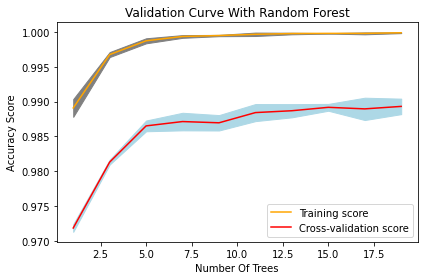

In [ ]:
param_range = np.arange(-1, 20, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X, 
                                             y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="orange")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="grey")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="lightblue")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# To Plot the decision trees inside random forest

In [ ]:
clf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1992564390, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=189642807, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, m

In [ ]:
import matplotlib.pyplot as plt 
from sklearn import tree

[Text(1620.6345601130163, 2130.9120000000003, 'X[40] <= 0.075\ngini = 0.754\nsamples = 9565\nvalue = [524, 233, 12, 1, 790, 98, 2, 95, 2, 1, 219, 660\n13, 11, 3095, 36, 6640, 3, 1, 24, 94, 400, 7, 8\n210, 475, 5, 425, 124, 212, 2, 10, 1, 649, 4, 8\n3, 7]'),
 Text(786.7110775526111, 2043.9360000000001, 'X[3] <= 0.13\ngini = 0.636\nsamples = 7087\nvalue = [45, 233, 10, 1, 770, 8, 0, 95, 2, 1, 219, 102\n12, 10, 979, 36, 6591, 3, 1, 24, 0, 322, 7, 8\n88, 233, 5, 425, 124, 212, 2, 10, 1, 640, 4, 8\n3, 6]'),
 Text(266.02494154325797, 1956.96, 'X[32] <= 70.5\ngini = 0.469\nsamples = 875\nvalue = [41, 28, 0, 0, 8, 0, 0, 0, 2, 0, 0, 88, 0, 0\n979, 36, 21, 0, 0, 0, 0, 93, 0, 0, 15, 44, 0\n0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0]'),
 Text(195.71317225253313, 1869.9840000000002, 'X[30] <= 0.395\ngini = 0.239\nsamples = 696\nvalue = [0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 11, 0, 0\n947, 36, 7, 0, 0, 0, 0, 20, 0, 0, 15, 44, 0\n0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0]'),
 Text(151.73811379579112, 1783.008, 'X[4] <= 0.5\ng

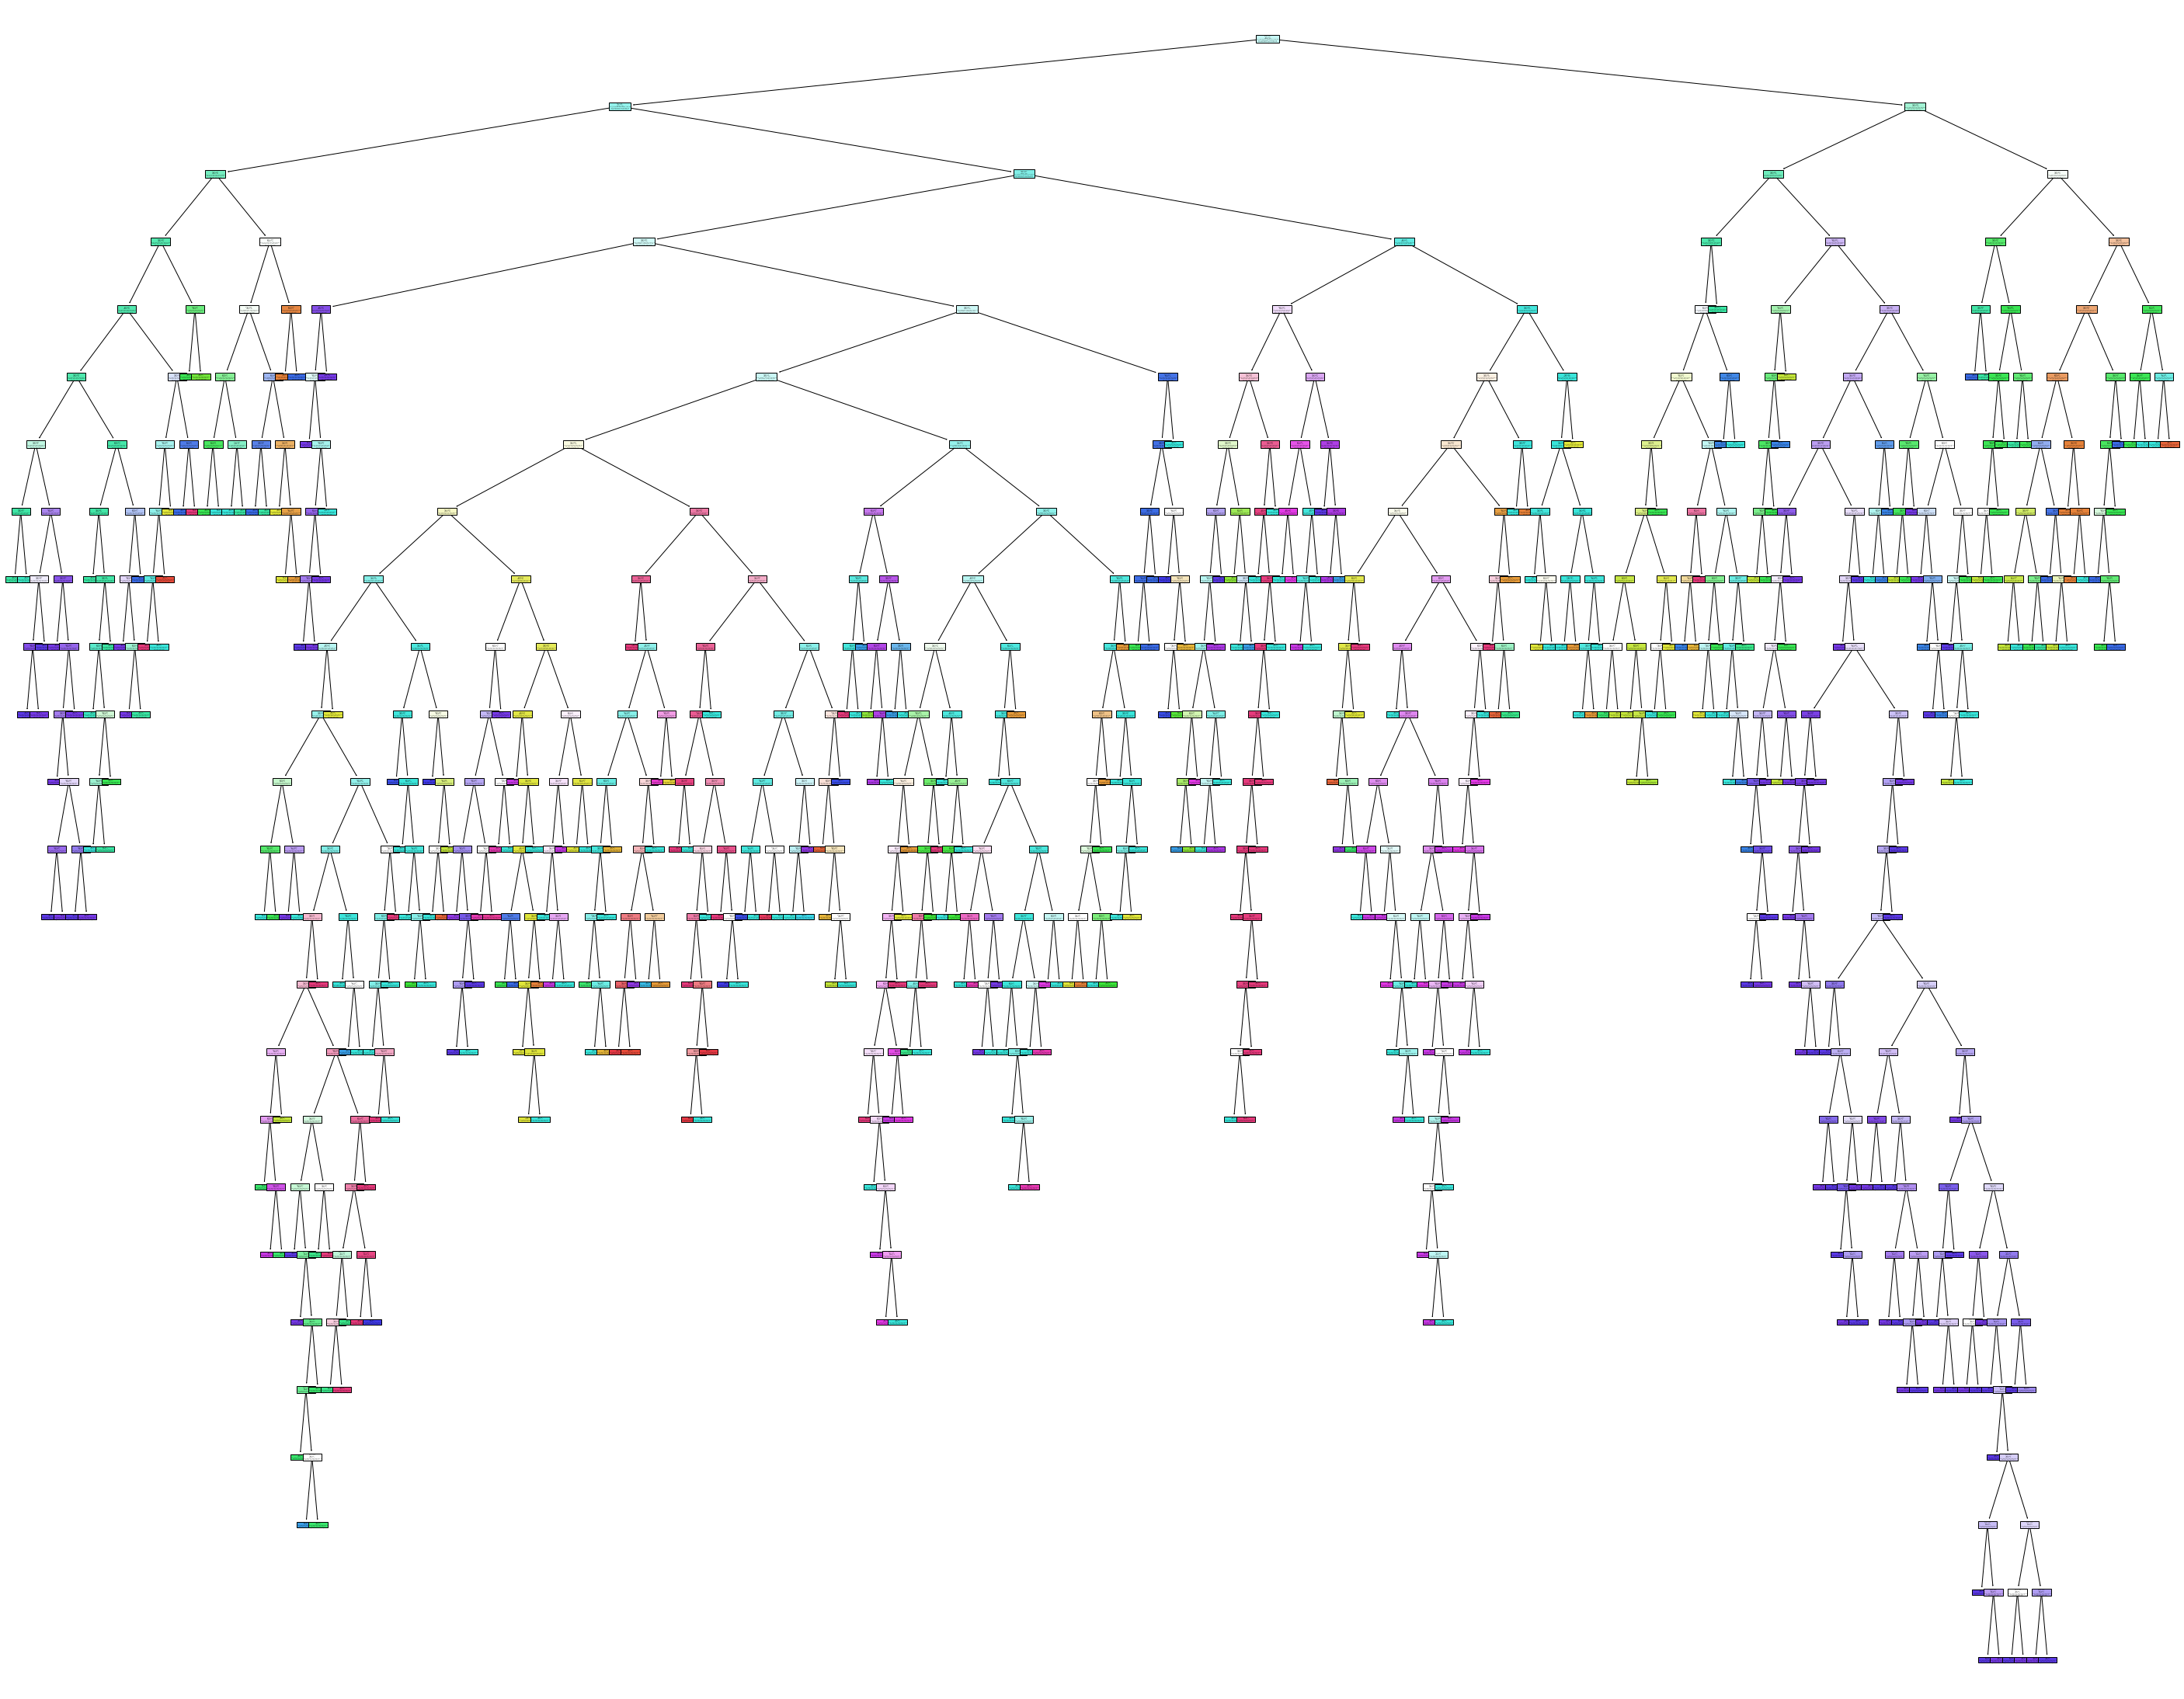

In [ ]:
plt.figure(figsize=(50,40))
tree.plot_tree(clf.estimators_[1],filled=True)

## Anotehr old way to plot trees from decision tree method

In [ ]:
features_1=list(df3.columns[0:119]) #names of the column heading in df3
target_names=list(target[0:25912])

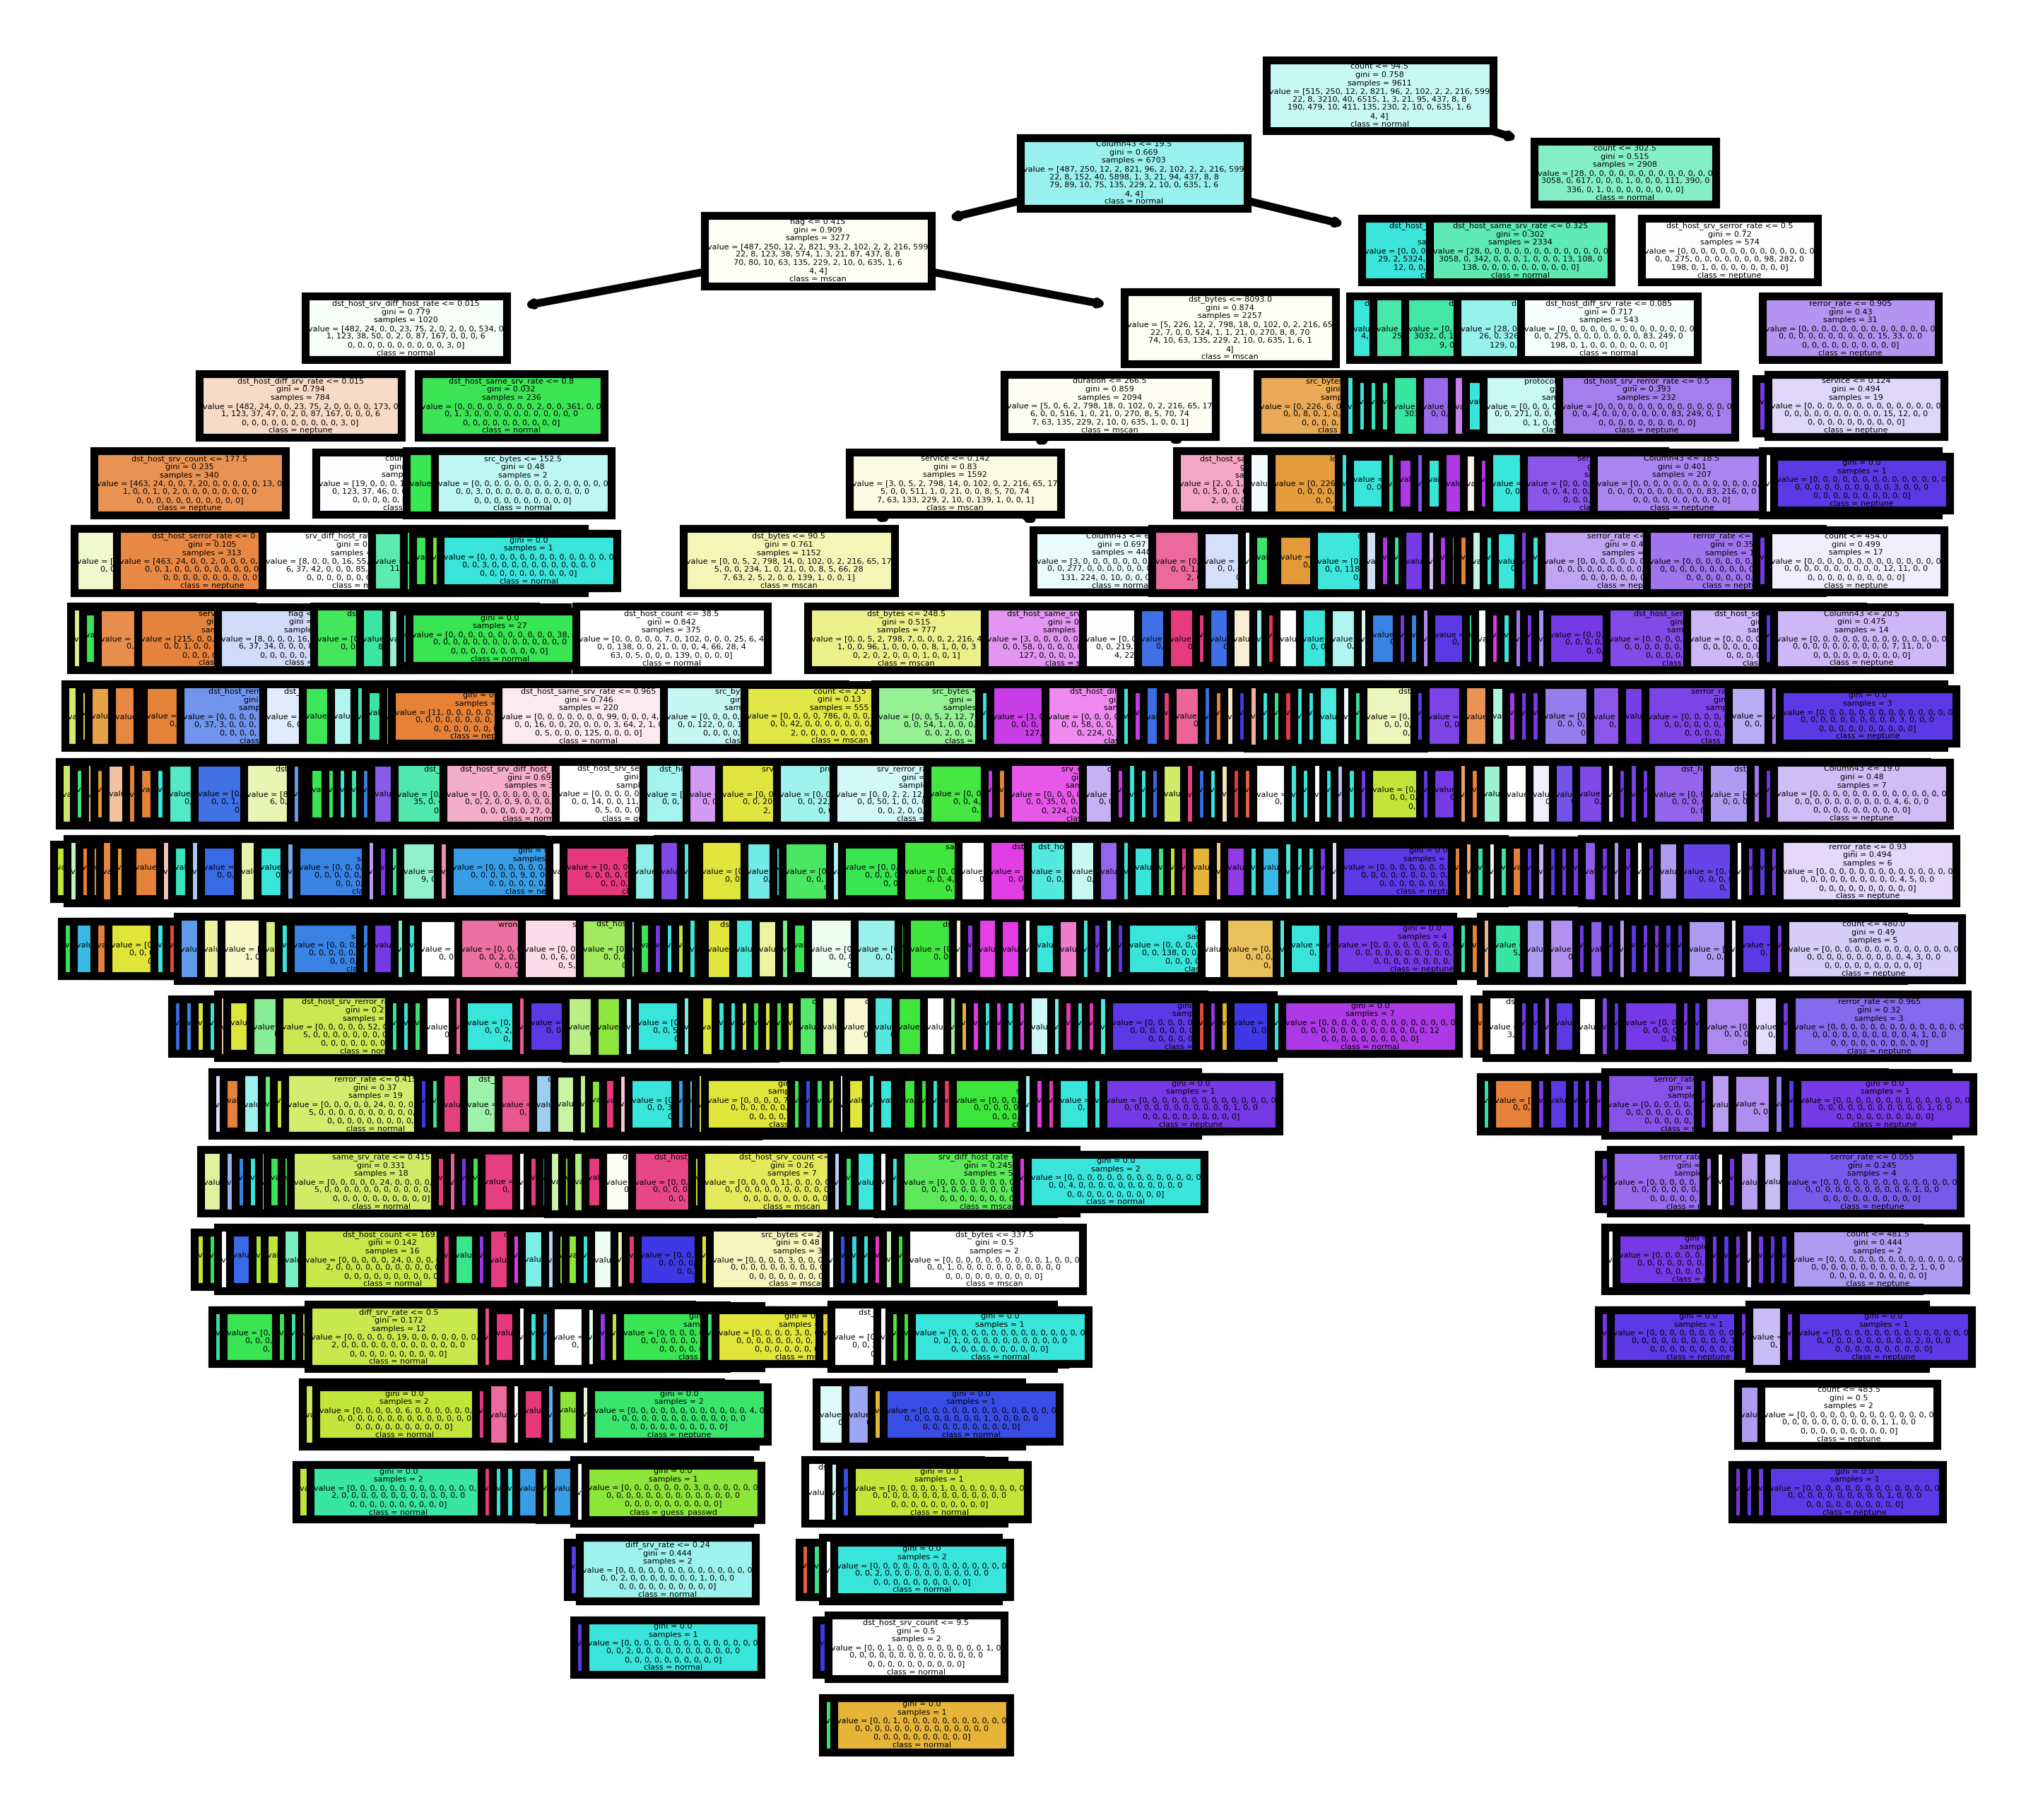

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[0],
               feature_names = features_1, 
               class_names=target_names,
               filled = True);
fig.savefig('rf_individualtree.png')

# Confusion Matrix_ Random Forest

In [ ]:
from sklearn.metrics import  classification_report,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[245,   0,   0, ...,   0,   0,   0],
       [  0, 112,   0, ...,   0,   0,   0],
       [  0,   0,   7, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   2,   0,   0],
       [  0,   0,   1, ...,   1,   0,   0],
       [  0,   0,   0, ...,   0,   0,   3]])

In [ ]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

        apache2       1.00      1.00      1.00       246
           back       1.00      1.00      1.00       112
buffer_overflow       0.54      0.64      0.58        11
   guess_passwd       0.99      1.00      1.00       385
     httptunnel       1.00      0.97      0.99        39
        ipsweep       1.00      1.00      1.00        48
           land       1.00      1.00      1.00         1
     loadmodule       0.00      0.00      0.00         1
       mailbomb       1.00      1.00      1.00       109
          mscan       0.99      1.00      1.00       348
       multihop       1.00      0.33      0.50         6
          named       0.25      1.00      0.40         1
        neptune       1.00      1.00      1.00      1539
           nmap       1.00      1.00      1.00        30
         normal       0.99      1.00      0.99      3190
           perl       0.00      0.00      0.00         1
            phf       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
